In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

##### 本作業設計一loss function(已知其全域最小值)，以loss之斜率作為評判是否停止進行epoch之標準，以找到該Loss的(近似)最佳位置
$$Loss=(x-1)*(x+2)^2*(x-4)，min Loss point=(2.921,-50.194)$$

In [2]:
#loss function
def lossfunc(x):
    y = (x-1)*((x+2)**2)*(x-4)
    return  y

#Loss對x 微分
def delossfunction(x):
    y = 4*(x**3)-3*(x**2)-(24*x)-4
    return  y

In [3]:
def grad(lr = 0.001,slopeCriteria=0.1):
    randInitPoint = np.random.randint(0,450)*0.01 #隨機起始點從0~4.5
    
    hisOfx = []
    hisOfx.append(randInitPoint)
    
    nowPoint = randInitPoint
    
    epoch = 0
    slope = delossfunction(randInitPoint)
    grad = -delossfunction(randInitPoint)*lr
    
    while(abs(slope)>slopeCriteria):
        
        nowPoint += grad
        slope = delossfunction(nowPoint)
        grad = -delossfunction(nowPoint)*lr
        hisOfx.append(nowPoint)
        epoch += 1
        
    print(f'num of used epoch:{epoch}')
    
    plotX = np.linspace(-1,4.5,1000)
    plt.plot(plotX,lossfunc(plotX))
    plt.scatter(hisOfx,list(map(lossfunc,hisOfx)), c='r')
    
    finalPoint = nowPoint
    
    return finalPoint

num of used epoch:361


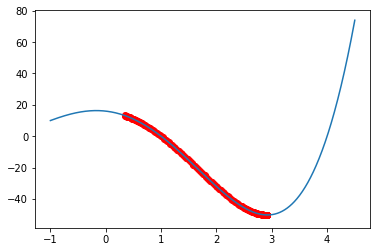

In [4]:
result = grad(lr = 0.001,slopeCriteria=0.000001) # finalPoint

In [5]:
slopeOfFinalPoint = delossfunction(result)
print(f'Slope Of Final Point:{slopeOfFinalPoint}')

Slope Of Final Point:-9.821340540838719e-07


In [6]:
LossOfFinalPoint = lossfunc(result)
print(f'Loss Of Final Point:{result,LossOfFinalPoint}')

Loss Of Final Point:(2.9211645934720614, -50.194432303567496)


#### 結果:由grad計算出最低Loss，與已知的min Loss非常相近